# Pymaceuticals Inc.
---

### Analysis

- Capomulin has demostrated effectiveness at reducing tumor volume in mice
- There is a strong coefficient of correlation between average mouse weight and tumor volume
- Sample size for Capomulin is the largest of available data

### Areas for further study

- Since we see a strong correlation between mouse weight and tumor size, it would be interesting to see how the results or apparent effectiveness might vary when having mouse weight 'normalized'

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_merged = pd.merge(study_results, mouse_metadata, how = 'outer', on = 'Mouse ID')
# Display the data table for preview
data_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
data_merged['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_rows = data_merged[data_merged.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
duplicated_mouse = duplicated_rows["Mouse ID"].unique()

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_data = data_merged[data_merged['Mouse ID'] == duplicated_mouse[0]]
duplicated_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
rows_to_drop = duplicated_mouse_data.index
data_cleaned = data_merged.drop(rows_to_drop, axis = 0)
data_cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
data_cleaned['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped = data_cleaned.groupby('Drug Regimen')
# Extract data
means = (grouped['Tumor Volume (mm3)'].mean())
medians = (grouped['Tumor Volume (mm3)'].median())
var_1 = (grouped['Tumor Volume (mm3)'].var())
std_1 = (grouped['Tumor Volume (mm3)'].std())
sems = (grouped['Tumor Volume (mm3)'].sem())

data = [means, medians, var_1, std_1, sems]

cols = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], ['mean', 'median', 'var', 'std', 'sem']])

# Merge data into new dataframe
drug_summary = pd.concat(data, axis = 1)
# Rename columns
drug_summary.columns = cols
drug_summary = drug_summary.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
drug_summary


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


drug_summary_v1 = data_cleaned.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})
drug_summary_v2 = drug_summary_v1.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
drug_summary_v2

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

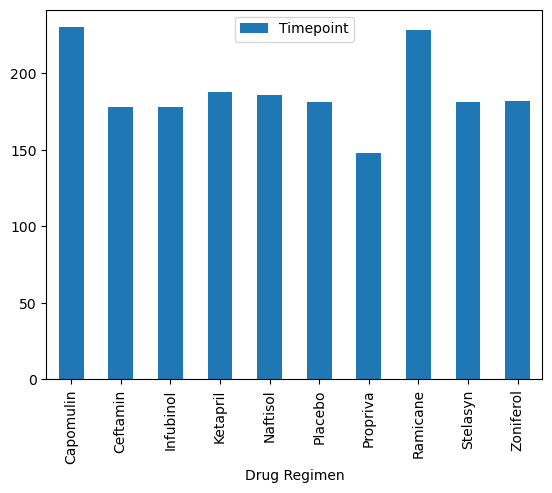

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

temp = data_cleaned.groupby('Drug Regimen')
temp = temp['Timepoint'].count()
tp_count = pd.DataFrame(temp)
tp_count.reset_index(inplace = True)
tp_count.plot(kind = 'bar', x = 'Drug Regimen', y = 'Timepoint')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

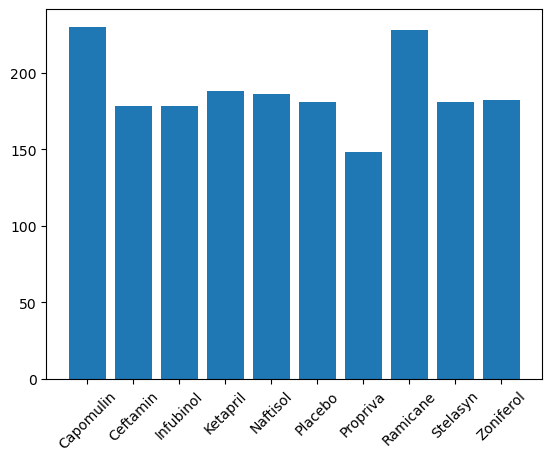

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = tp_count['Drug Regimen']
y_axis = tp_count['Timepoint']

plt.bar(x_axis, y_axis)
plt.xticks(rotation = 45)

<Axes: ylabel='Sex'>

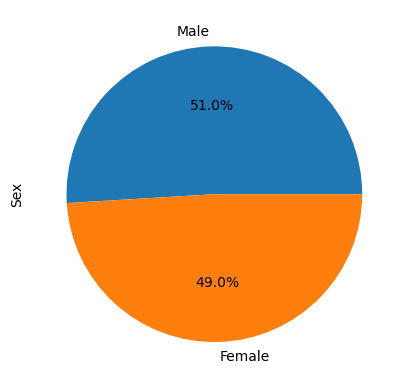

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_data = data_cleaned['Sex'].value_counts()
sex_data.plot.pie(y = 'Sex', autopct='%1.1f%%')


Text(0, 0.5, 'Sex')

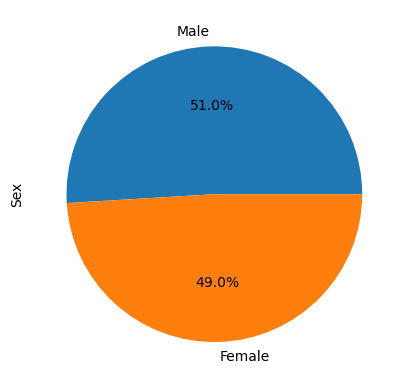

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_data, labels = sex_data.index, autopct='%1.1f%%')
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin  

# Start by getting the last (greatest) timepoint for each mouse
drugs_to_keep = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

data_reduced = data_cleaned.loc[data_cleaned['Drug Regimen'].isin(drugs_to_keep)]
max_timepoints = data_reduced.groupby('Mouse ID')['Timepoint'].max()

max_timepoints = max_timepoints.reset_index()

max_tumor = max_timepoints.merge(data_reduced, on=['Mouse ID', 'Timepoint'], how='left')

max_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [17]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = drugs_to_keep

# Create empty list to fill with tumor vol data (for plotting)

tum_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    final_tum_vol = max_tumor.loc[max_tumor['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    
    tum_vol.append(final_tum_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tum_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = final_tum_vol.loc[(final_tum_vol < lower_bound) | (final_tum_vol > upper_bound)]
    print(f"{drug}'s potential outliers {outliers}")

Capomulin's potenrial outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potenrial outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potenrial outliers 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potenrial outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


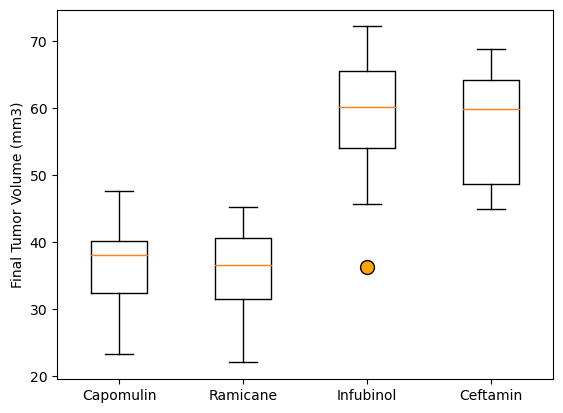

In [62]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

outlier_settings = {'markerfacecolor' : 'orange', 'markersize' : 10}

plt.boxplot(tum_vol, labels = treatments, flierprops=outlier_settings)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment Results (mouse Y793)')

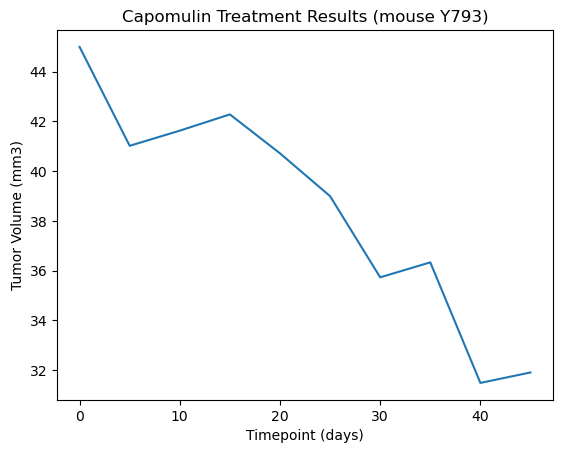

In [39]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

cap_table = data_cleaned[data_cleaned['Drug Regimen'] == 'Capomulin']
mouse_data = cap_table[cap_table['Mouse ID'] == 'y793']
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment Results (mouse Y793)")

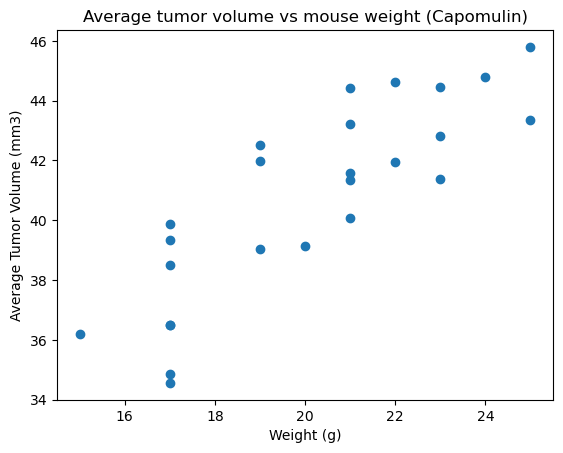

In [48]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_data = data_cleaned[data_cleaned["Drug Regimen"] == "Capomulin"]
capomulin_avg = capomulin_data.groupby('Mouse ID').mean(numeric_only = True)
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average tumor volume vs mouse weight (Capomulin)")
plt.show()

## Correlation and Regression

The correlation score between mouse weight and tumor volume is 0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

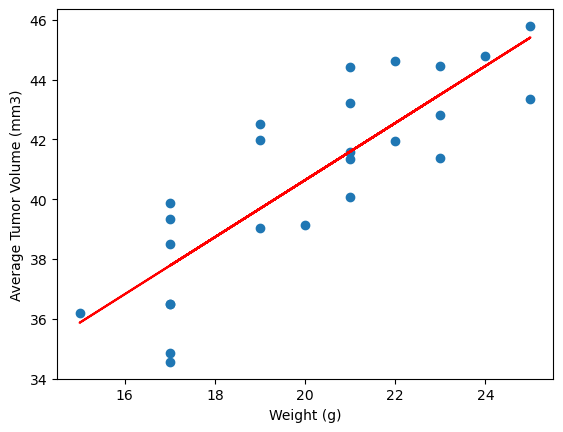

In [60]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
print(f'The correlation score between mouse weight and tumor volume is {correlation[0]:.2f}')

model = st.linregress(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
slope = model[0]
intercept = model[1]
y_val = capomulin_avg['Weight (g)'] * slope + intercept
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'], y_val, color ='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
